# Venture Captial Funding in Startups

1. How did the Top 50 leading VC firms compare to a wide range of other investor (which included other VCs firms, PE firms, Individuals, Governments, Funds, etc)


1 slide for Introduction (Question, Motivation, Data)
1 (or 2) slide for results (Charts)
1 slide for Conclusion (Answer) and Limitations

In [681]:
# Dependencies
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats as sts
from scipy.stats import linregress
import collections
from  itertools import combinations
import datetime as dt

In [682]:
#to figure out what encoding to use to open csv
with open('resources/Pitchbook.csv') as f:
    print(f)

<_io.TextIOWrapper name='resources/Pitchbook.csv' mode='r' encoding='cp1252'>


In [683]:
#reading csv
uncleaned = pd.read_csv('resources/Pitchbook.csv', encoding='cp1252')


In [684]:
#get the name of the columns I want to use for my cleaned dataset
print(list(uncleaned.columns))


['Company ID', 'Company Name', 'Company Former Name', 'Company Also Known As', 'Competitors', 'PBId', 'Description', 'Primary Industry Sector', 'Primary Industry Group', 'Primary Industry Code', 'All Industries', 'Verticals', 'Keywords', 'Company Financing Status', 'Total Raised', 'Business Status', 'Ownership Status', 'Universe', 'Website', 'Employees', 'Employee History', 'Exchange', 'Ticker', 'Year Founded', 'Parent Company', 'Daily Updates', 'Weekly Updates', 'Revenue', 'Gross Profit', 'Net Income', 'Enterprise Value', 'EBITDA', 'Fiscal Period', 'EBIT', 'Market Cap', 'Net Debt', 'Primary Contact PBId', 'Primary Contact', 'Primary Contact Title', 'Primary Contact Email', 'Primary Contact Phone', 'HQ Location', 'HQ Address Line 1', 'HQ Address Line 2', 'HQ City', 'HQ State/Province', 'HQ Post Code', 'HQ Country', 'HQ Phone', 'HQ Fax', 'HQ Email', 'HQ Global Region', 'HQ Global Sub Region', 'Financing Status Note', 'Active Investors', '# Active Investors', 'Acquirers', 'Former Investo

In [685]:
#creating my venture capital dataframe that will be the base to answering my questions

venture = uncleaned[['Company ID', 'Company Name', 'Year Founded', 'HQ Location',
       'HQ Country', 'HQ Global Region','Primary Industry Sector', 'Primary Industry Group', 'Verticals',
       'Total Raised','Active Investors',
       '# Active Investors', 'First Financing Date', 'First Financing Size', 'First Financing Valuation',
       'First Financing Deal Type', 'First Financing Deal Type 2',
       'Last Financing Date', 'Last Financing Size', 'Last Financing Valuation', 
       'Last Financing Deal Type', 'Last Financing Deal Type 2', 'Growth Rate', 'Growth Rate % Change', 'Size Multiple',
                    'Size Multiple % Change']]

venture['First Financing Date'] = pd.to_datetime(venture['First Financing Date'])
venture['Last Financing Date'] = pd.to_datetime(venture['Last Financing Date'])


C:\Users\admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':
C:\Users\admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]


In [686]:
venture.head()

,Company ID,Company Name,Year Founded,HQ Location,HQ Country,HQ Global Region,Primary Industry Sector,Primary Industry Group,Verticals,Total Raised,...,First Financing Deal Type 2,Last Financing Date,Last Financing Size,Last Financing Valuation,Last Financing Deal Type,Last Financing Deal Type 2,Growth Rate,Growth Rate % Change,Size Multiple,Size Multiple % Change
0,63996-58,Zyvex Technologies,1997.0,"Columbus, OH",United States,Americas,Business Products and Services (B2B),Commercial Products,Nanotechnology,4.00,...,NaN,2010-01-01,7.20,NaN,Grant,NaN,-4.27%,0.00%,3.86x,-0.88%
1,60184-09,Zyomed,2007.0,"Altadena, CA",United States,Americas,Healthcare,Healthcare Devices and Supplies,HealthTech,23.11,...,Series A,2016-05-17,10.61,132.61,Early Stage VC,Series B2,0.00%,0.00%,0.03x,0.00%
2,162693-55,Zylo,2016.0,"Indianapolis, IN",United States,Americas,Business Products and Services (B2B),Commercial Services,"SaaS, TMT",12.60,...,Seed Round,2018-01-23,9.30,29.30,Early Stage VC,Series A,2.23%,5.22%,4.18x,20.95%
3,52214-95,Zya,2008.0,"Calabasas, CA",United States,Americas,Consumer Products and Services (B2C),Media,"Mobile, TMT",53.86,...,Angel (individual),2017-09-30,9.00,NaN,Later Stage VC,NaN,-4.56%,0.07%,41.16x,-5.26%
4,179431-57,Zunum Aero,2013.0,"Bothell, WA",United States,Americas,Consumer Products and Services (B2C),Transportation,Manufacturing,0.00,...,NaN,2018-01-10,0.01,NaN,Angel (individual),Angel (individual),0.53%,-1.66%,6.34x,0.96%


In [687]:
# Count number of missing values per column
missingCount = venture.isnull().sum()
missingCount

Company ID                        0
Company Name                      0
Year Founded                     76
HQ Location                       4
HQ Country                        4
HQ Global Region                  4
Primary Industry Sector           2
Primary Industry Group            2
Verticals                        93
Total Raised                    214
Active Investors                 37
# Active Investors               37
First Financing Date            314
First Financing Size            671
First Financing Valuation      1336
First Financing Deal Type         0
First Financing Deal Type 2     858
Last Financing Date             207
Last Financing Size             569
Last Financing Valuation       1266
Last Financing Deal Type          0
Last Financing Deal Type 2      897
Growth Rate                      82
Growth Rate % Change             88
Size Multiple                    82
Size Multiple % Change           88
dtype: int64

In [688]:
venture.describe(include='all')


,Company ID,Company Name,Year Founded,HQ Location,HQ Country,HQ Global Region,Primary Industry Sector,Primary Industry Group,Verticals,Total Raised,...,First Financing Deal Type 2,Last Financing Date,Last Financing Size,Last Financing Valuation,Last Financing Deal Type,Last Financing Deal Type 2,Growth Rate,Growth Rate % Change,Size Multiple,Size Multiple % Change
count,1997,1997,1921.000000,1993,1993,1993,1995,1995,1904,1783,...,1139,1790,1428,731,1997,1100,1915,1909,1915,1909
unique,1997,1997,NaN,502,47,6,7,36,598,1358,...,18,868,591,523,28,37,518,1196,1262,1004
top,10134-19,Lightbits Labs,NaN,"San Francisco, CA",United States,Americas,Information Technology,Software,TMT,3.00,...,Series A,2018-01-01 00:00:00,10.00,100.00,Later Stage VC,Series B,0.00%,0.00%,0.31x,0.00%
freq,1,1,NaN,211,1373,1461,1111,894,182,15,...,513,15,48,9,731,259,282,387,10,108
first,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,1999-09-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,2019-07-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,2010.216033,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,5.617557,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,1959.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,2008.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [689]:
venture.dtypes

Company ID                             object
Company Name                           object
Year Founded                          float64
HQ Location                            object
HQ Country                             object
HQ Global Region                       object
Primary Industry Sector                object
Primary Industry Group                 object
Verticals                              object
Total Raised                           object
Active Investors                       object
# Active Investors                    float64
First Financing Date           datetime64[ns]
First Financing Size                   object
First Financing Valuation              object
First Financing Deal Type              object
First Financing Deal Type 2            object
Last Financing Date            datetime64[ns]
Last Financing Size                    object
Last Financing Valuation               object
Last Financing Deal Type               object
Last Financing Deal Type 2        

In [736]:
#converting specific columns into floats 

venture["First Financing Size"] = pd.to_numeric(venture['First Financing Size'], errors='coerce')
venture["First Financing Valuation"] = pd.to_numeric(venture['First Financing Valuation'], errors='coerce')
venture["Last Financing Size"] = pd.to_numeric(venture['Last Financing Size'], errors='coerce')
venture["Last Financing Valuation"] = pd.to_numeric(venture['Last Financing Valuation'], errors='coerce')
venture["Total Raised"] = pd.to_numeric(venture['Total Raised'], errors='coerce')

C:\Users\admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
C:\Users\admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try usin

In [691]:
#number of companies in the dataset
startup_total = venture['Company Name'].count()
startup_total
print(f'The total number of startups: {startup_total}')

The total number of startups: 1997


In [692]:
#separating the investors into multiple columns that are currently in the 'Active Investors' column and separated by commas
#to better understand how many investors there are
investors = venture['Active Investors'].str.split(',', expand = True)
investors.fillna(value=pd.np.nan, inplace=True)
investors.head()

,0,1,2,3,4,5,6,7,8,9,...,96,97,98,99,100,101,102,103,104,105
0,Arkema,Defense Advanced Research Projects Agency,Lockheed Martin Ventures,National Aeronautics and Space Administration,State of Ohio Department of Development,U.S. Navy,United States Army,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Khosla Ventures,Samsung Catalyst,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Bessemer Venture Partners,Collina Ventures,Donald Brown,GGV Capital,Haystack,High Alpha,Hyde Park Venture Partners,Peter McCormick,Revolution,Router Ventures,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,500 Startups,Individual Investor,Intel Capital,Liberty Global Ventures,Shea Ventures,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Boeing HorizonX,JetBlue Technology Ventures,Washington State Department Of Commerce,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [693]:
#finding out which investors made multiple investments in the companies in complete dataset of 2000 startups
investors = investors.melt(var_name='columns', value_name='index')
investors.head()

,columns,index
0,0,Arkema
1,0,Khosla Ventures
2,0,Bessemer Venture Partners
3,0,500 Startups
4,0,Boeing HorizonX


In [694]:
#viewing total number of unique investors and ranking in frequency of investing in the companies in the dataset
investors = pd.crosstab(index=investors['index'], columns=investors['columns'])
total_investors = investors.index.nunique()
print(f'Total number of unique investors: {total_investors}')
investors


Total number of unique investors: 8700


columns,0,1,2,3,4,5,6,7,8,9,...,96,97,98,99,100,101,102,103,104,105
index,,,,,,,,,,,,,,,,,,,,,
2009583 Ontario Ltd.,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2020 Ventures,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2B Angels,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
301,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
360 total security,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
dPixel,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ePlanet Capital,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
entrepreneurship@UBC Seed Fund,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [695]:
#creating a column that will total the number of investments per VC firm
investors['Total'] = investors.loc[:,0:105].sum(1)


In [696]:
#investors with the most investments into different companies
investor_count = investors['Total'].sort_values(ascending=False)
investor_count.head()

index
 Salesforce Ventures           195
 Individual Investor           129
 Samsung Venture Investment    122
 Comcast Ventures              105
 Plug and Play Tech Center     102
Name: Total, dtype: int64

In [745]:
#creating a dataframe with the sum of all top 50 VC firms investments from original dataset 'venture'. total 1997 companies
top_investors = investor_count.head(50)
top_50 = top_investors.head(50).rename_axis('Investor Names').reset_index(name='Number of Investments')
top_50_vc = list(top_50['Investor Names'])
top_50.head()

,Investor Names,Number of Investments
0,Salesforce Ventures,195
1,Individual Investor,129
2,Samsung Venture Investment,122
3,Comcast Ventures,105
4,Plug and Play Tech Center,102


In [746]:
#dropping Individual Investor from the dataframe of Top 50 VCs
top_50 = top_50.drop(1)

In [754]:
#creating a new dataframe with only startups that must have a value in
#'First Financing Size' and 'Last Financing Size' columns:  I will be using these columns in my analysis

a = ~venture['First Financing Size'].isna()
b = ~venture['Last Financing Size'].isna()

first_last = venture[(a & b)==True]
print(f'The new dataframe has a total of {len(first_last)} startups')

The new dataframe has a total of 1044 startups


In [755]:
#separating the investors for each company from the 'first_last' dataframe, total of 1044 startups
investors2 = first_last['Active Investors'].str.split(',', expand = True)
investors2.fillna(value=pd.np.nan, inplace=True)
investors2.head()

,0,1,2,3,4,5,6,7,8,9,...,96,97,98,99,100,101,102,103,104,105
0,Arkema,Defense Advanced Research Projects Agency,Lockheed Martin Ventures,National Aeronautics and Space Administration,State of Ohio Department of Development,U.S. Navy,United States Army,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Khosla Ventures,Samsung Catalyst,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Bessemer Venture Partners,Collina Ventures,Donald Brown,GGV Capital,Haystack,High Alpha,Hyde Park Venture Partners,Peter McCormick,Revolution,Router Ventures,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,500 Startups,Individual Investor,Intel Capital,Liberty Global Ventures,Shea Ventures,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Boeing HorizonX,JetBlue Technology Ventures,Washington State Department Of Commerce,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [756]:
#trying to get a count of how many investments the VCs made in the 'first_last' df
investors2 = investors2.melt(var_name='columns', value_name='index')
investors2.head()

,columns,index
0,0,Arkema
1,0,Khosla Ventures
2,0,Bessemer Venture Partners
3,0,500 Startups
4,0,Boeing HorizonX


In [757]:
#viewing total number of unique investors and ranking in frequency of investing in the companies in the 'first_last' df
investors2 = pd.crosstab(index=investors2['index'], columns=investors2['columns'])
total_investors2 = investors2.index.nunique()
print(f'Total number of unique investors: {total_investors2}')
investors2


Total number of unique investors: 5664


columns,0,1,2,3,4,5,6,7,8,9,...,96,97,98,99,100,101,102,103,104,105
index,,,,,,,,,,,,,,,,,,,,,
2020 Ventures,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2B Angels,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
360 total security,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3Rodeo,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5xmais,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Vencore Capital,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Verizon Ventures,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Vista Equity Partners,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [758]:
#creating total column to get sum of all top 50 VC firms investments into companies
investors2['Total'] = investors2.loc[:,0:105].sum(1)


In [759]:
#investors with the most investments into different companies
vc_count = investors2['Total'].sort_values(ascending=False)
vc_count.head()

index
 Salesforce Ventures           109
 Samsung Venture Investment     73
 Comcast Ventures               69
 Individual Investor            67
 Plug and Play Tech Center      52
Name: Total, dtype: int64

In [760]:
new_top_investors = vc_count.head(51)
new_top_50 = new_top_investors.head(51).rename_axis('Investor Names').reset_index(name='Number of Investments')
new_top_50_vc = list(new_top_50['Investor Names'])
new_top_50.head()

,Investor Names,Number of Investments
0,Salesforce Ventures,109
1,Samsung Venture Investment,73
2,Comcast Ventures,69
3,Individual Investor,67
4,Plug and Play Tech Center,52


In [710]:
#dropping 'Individual Investor' from top 50 VC list
new_top_50 = new_top_50.drop(1)


In [761]:
#creating the top 50 VC firms list

final_50 = ['Salesforce Ventures', 'Samsung Venture Investment','Comcast Ventures','Plug and Play Tech Center','Cisco Investments',
 'Intel Capital','GV','Y Combinator','SV Angel', 'Samsung NEXT Ventures','Kleiner Perkins','Verizon Ventures','Khosla Ventures',
 'New Enterprise Associates','Hearst Ventures','Recruit Strategic Partners','Accel','Next47','Techstars',
 'Lightspeed Venture Partners','Baidu Ventures','Redpoint Ventures','ORIX Growth Capital','CAA Ventures','National Science Foundation',
 'Presidio Ventures','Liberty Global Ventures','Battery Ventures','Lerer Hippeau','Greycroft',
 'Western Technology Investment', 'GE Ventures','Qualcomm Ventures','Norwest Venture Partners','500 Startups',
 'Greylock Partners','Sequoia Capital','GGV Capital','BoxGroup','Bertelsmann Digital Media Investments',
 'Shell Ventures','Bessemer Venture Partners','In-Q-Tel','Western Digital Capital','Silicon Valley Bank','BMW i Ventures',
 'SoftBank Capital','The Goldman Sachs Group','Felicis Ventures','Data Collective']

In [712]:
#splitting all the investors from the 'Active Investors' column and creating a set

set(first_last['Active Investors'][0].split(', '))

{'Arkema',
 'Defense Advanced Research Projects Agency',
 'Lockheed Martin Ventures',
 'National Aeronautics and Space Administration',
 'State of Ohio Department of Development',
 'U.S. Navy',
 'United States Army'}

In [713]:
#checking to see that you can call on an individual investor in a set 
'Arkema' in set(first_last['Active Investors'][0].split(', '))

True

In [714]:
#cheching column type and for nulls
first_last['Active Investors'].dtype
first_last['Active Investors'].isnull().value_counts()


False    1036
True        8
Name: Active Investors, dtype: int64

In [715]:

x = 'a'

type(x) == str


True

In [716]:
#create a new column called 'Active Investors Set' to be able to pull companies by their active investors

def string_to_set(x):
    if type(x) == str:
        return set(x.split(', '))
    
first_last['Active Investors Set'] = first_last['Active Investors'].apply(string_to_set)

C:\Users\admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [717]:
#viewing the'Active Investors' and newly created 'Active Investors Set' columns 

first_last[['Active Investors', 'Active Investors Set']].head()

,Active Investors,Active Investors Set
0,"Arkema, Defense Advanced Research Projects Age...","{Defense Advanced Research Projects Agency, St..."
1,"Khosla Ventures, Samsung Catalyst","{Samsung Catalyst, Khosla Ventures}"
2,"Bessemer Venture Partners, Collina Ventures, D...","{Haystack, High Alpha, Peter McCormick, GGV Ca..."
3,"500 Startups, Individual Investor, Intel Capit...","{Shea Ventures, Liberty Global Ventures, 500 S..."
4,"Boeing HorizonX, JetBlue Technology Ventures, ...","{JetBlue Technology Ventures, Boeing HorizonX,..."


In [718]:
#creating a loop that will go throught the dataframe 'first_last' and select all companies that at least 1 
#of the top 50 VC firms invested in

final_50_df = pd.DataFrame()

for vc in final_50:
    for i, sets in enumerate(first_last['Active Investors Set']):
        try:
            if vc in sets:
                final_50_df = final_50_df.append(first_last.loc[[i] , : ])
        except:
            continue


In [734]:
#droping duplicates from the loop in the previous cell

final_50_df = final_50_df.drop_duplicates(subset=['Company Name'], keep=False)

In [733]:
#list of the names of the top 50 VC firms that are included in final_50_df 

vc_companies = list(final_50_df['Company Name'])

In [730]:
#creating another dataframe of all companies that all other investors (not top 50 VC firms), invested in

other_investors = first_last[~first_last['Company Name'].isin(vc_companies)]

other_investors.shape

(631, 27)

In [722]:
#change object to floats

final_50_df["First Financing Size"] = pd.to_numeric(final_50_df['First Financing Size'], errors='coerce')
final_50_df["First Financing Valuation"] = pd.to_numeric(final_50_df['First Financing Valuation'], errors='coerce')
final_50_df["Last Financing Size"] = pd.to_numeric(final_50_df['Last Financing Size'], errors='coerce')
final_50_df["Last Financing Valuation"] = pd.to_numeric(final_50_df['Last Financing Valuation'], errors='coerce')
final_50_df["Total Raised"] = pd.to_numeric(final_50_df['Total Raised'], errors='coerce')

final_50_df.shape

(230, 27)

In [723]:
final_50_df.isnull().sum()

Company ID                       0
Company Name                     0
Year Founded                     8
HQ Location                      1
HQ Country                       1
HQ Global Region                 1
Primary Industry Sector          0
Primary Industry Group           0
Verticals                        8
Total Raised                     1
Active Investors                 0
# Active Investors               0
First Financing Date             9
First Financing Size             0
First Financing Valuation      107
First Financing Deal Type        0
First Financing Deal Type 2     63
Last Financing Date              9
Last Financing Size              0
Last Financing Valuation       109
Last Financing Deal Type         0
Last Financing Deal Type 2      61
Growth Rate                     10
Growth Rate % Change            12
Size Multiple                   10
Size Multiple % Change          12
Active Investors Set             0
dtype: int64

In [724]:
final_50_df.describe(include='all')

,Company ID,Company Name,Year Founded,HQ Location,HQ Country,HQ Global Region,Primary Industry Sector,Primary Industry Group,Verticals,Total Raised,...,Last Financing Date,Last Financing Size,Last Financing Valuation,Last Financing Deal Type,Last Financing Deal Type 2,Growth Rate,Growth Rate % Change,Size Multiple,Size Multiple % Change,Active Investors Set
count,230,230,222.000000,229,229,229,230,230,222,229.000000,...,221,230.000000,121.000000,230,169,220,218,220,218,230
unique,230,230,NaN,105,18,4,7,27,139,NaN,...,197,NaN,NaN,14,22,148,181,207,188,230
top,183923-74,WiTricity,NaN,"San Francisco, CA",United States,Americas,Information Technology,Software,TMT,NaN,...,2017-10-30 00:00:00,NaN,NaN,Later Stage VC,Series A,0.00%,0.00%,2.25x,0.00%,"{Baidu Ventures, MindWorks Ventures, ZhenFund}"
freq,1,1,NaN,28,185,192,140,115,19,NaN,...,3,NaN,NaN,93,42,27,30,3,10,1
first,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2004-06-14 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2019-06-03 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,2011.441441,NaN,NaN,NaN,NaN,NaN,NaN,56.185459,...,NaN,31.732739,145.422149,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,4.552727,NaN,NaN,NaN,NaN,NaN,NaN,76.666169,...,NaN,67.889594,197.475510,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,1989.000000,NaN,NaN,NaN,NaN,NaN,NaN,0.020000,...,NaN,0.020000,0.330000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,2009.000000,NaN,NaN,NaN,NaN,NaN,NaN,7.560000,...,NaN,4.025000,19.700000,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [771]:
#looking at which Industry Sectors the Top 50 firms invested in by count, percentage, sum and total
sector = round(final_50_df['Primary Industry Sector'].value_counts(normalize=True),2) *100
sector_count = final_50_df['Primary Industry Sector'].value_counts()
sector_raised = final_50_df.groupby(['Primary Industry Sector'])['Total Raised'].sum()
sector_first = final_50_df.groupby(['Primary Industry Sector'])['First Financing Size'].mean()
sector_last = final_50_df.groupby(['Primary Industry Sector'])['Last Financing Size'].mean()


In [769]:
by_sector = pd.DataFrame({'Number of Investments per Industry': sector_count,
                         'Invested % by Industry': sector,
                         'Sum of Money Raised by Industy': sector_raised,
                          "Avg Size of First Financing": sector_first,
                          "Avg Size of Last Financing": sector_last
                         })

by_sector

,Number of Investments per Industry,Invested % by Industry,Sum of Money Raised by Industy,Avg Size of First Financing,Avg Size of Last Financing
Business Products and Services (B2B),29,13.0,1512.11,7.876207,40.223448
Consumer Products and Services (B2C),35,15.0,1546.56,3.078286,30.006857
Energy,11,5.0,938.68,9.407273,22.914545
Financial Services,3,1.0,164.71,5.353333,20.533333
Healthcare,11,5.0,279.51,2.958182,10.169091
Information Technology,140,61.0,8351.55,5.399286,33.130643
Materials and Resources,1,0.0,73.35,0.040000,18.000000


In [770]:
#looking at which Industry Sectors the other investors by count and percentag, sum and avg
sector2 = round(other_investors['Primary Industry Sector'].value_counts(normalize=True),2) *100
sector_count2 = other_investors['Primary Industry Sector'].value_counts()
sector_raised2 = other_investors.groupby(['Primary Industry Sector'])['Total Raised'].sum()
sector_first2 = other_investors.groupby(['Primary Industry Sector'])['First Financing Size'].mean()
sector_last2 = other_investors.groupby(['Primary Industry Sector'])['Last Financing Size'].mean()


Information Technology                  348
Consumer Products and Services (B2C)    115
Business Products and Services (B2B)     94
Healthcare                               36
Energy                                   25
Financial Services                        8
Materials and Resources                   4
Name: Primary Industry Sector, dtype: int64

In [772]:
by_sector2 = pd.DataFrame({'Number of Investments per Industry': sector_count2,
                         'Invested % by Industry': sector2,
                         'Sum of Money Raised by Industy': sector_raised2,
                          "Avg Size of First Financing": sector_first2,
                          "Avg Size of Last Financing": sector_last2
                         })

by_sector2

,Number of Investments per Industry,Invested % by Industry,Sum of Money Raised by Industy,Avg Size of First Financing,Avg Size of Last Financing
Business Products and Services (B2B),94,15.0,5730.24,3.930426,32.482872
Consumer Products and Services (B2C),115,18.0,5926.30,4.393043,27.468870
Energy,25,4.0,2408.03,4.917200,25.563200
Financial Services,8,1.0,1224.63,4.695000,103.971250
Healthcare,36,6.0,2047.06,5.289444,26.123889
Information Technology,348,55.0,21761.82,5.047098,28.344684
Materials and Resources,4,1.0,485.39,22.505000,25.807500


In [732]:
#changing date in specific columns into year

final_50_df['First Financing Year'] = final_50_df['First Financing Date'].apply(lambda x: x.year)
final_50_df['Last Financing Year'] = final_50_df['Last Financing Date'].apply(lambda x: x.year)


#looking at the First and Last financing size by the year
x_first = final_50_df.groupby(['First Financing Year'])['First Financing Size'].sum()
y_last = final_50_df.groupby(['Last Financing Year'])['Last Financing Size'].sum()

it = final_50_df[(final_50_df["Primary Industry Sector"] == "Information Technology")]

x_it = it.groupby(['First Financing Year'])['First Financing Size'].sum().reset_index()
y_it = it.groupby(['Last Financing Year'])['Last Financing Size'].sum()
x_it
#want to plot x_first or y_last vs the same years/sum for Information Technology

,First Financing Year,First Financing Size
0,1999.0,15.60
1,2000.0,22.40
2,2002.0,4.50
3,2003.0,6.00
4,2004.0,3.50
5,2006.0,5.00
6,2007.0,16.72
7,2008.0,6.78
8,2009.0,25.17
9,2010.0,15.34


In [728]:
it = final_50_df[(final_50_df["Primary Industry Sector"] == "Information Techology")]
grouped_df = final_50_df.groupby(["First Financing Year","Primary Industry Sector"])['First Financing Size'].sum()


# I want to see by year
grouped_df = grouped_df.reset_index()
grouped_df

,First Financing Year,Primary Industry Sector,First Financing Size
0,1999.0,Information Technology,15.60
1,2000.0,Information Technology,22.40
2,2001.0,Business Products and Services (B2B),0.10
3,2002.0,Information Technology,4.50
4,2003.0,Information Technology,6.00
5,2004.0,Business Products and Services (B2B),0.03
6,2004.0,Information Technology,3.50
7,2005.0,Business Products and Services (B2B),5.50
8,2006.0,Consumer Products and Services (B2C),12.47
9,2006.0,Information Technology,5.00


In [773]:
date_diff = final_50_df['Last Financing Date'] - final_50_df['First Financing Date']

date_avg = date_diff.mean() 
date_avg

Timedelta('1476 days 05:51:32.957746')

Timedelta('1476 days 05:51:32.957746')

C:\Users\admin\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


Text(0, 0.5, 'Tumor Volume (mm3)')

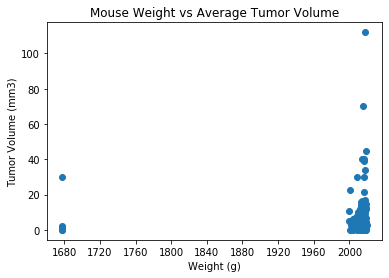

In [586]:

plt.scatter(final_50_df['First Financing Date'], final_50_df['First Financing Size'])
plt.title('Mouse Weight vs Average Tumor Volume')
plt.xlabel("Weight (g)")
plt.ylabel("Tumor Volume (mm3)")


In [527]:
industry_group = round(final_50_df['Primary Industry Group'].value_counts(normalize=True),2) *100
industry_group.head

<bound method NDFrame.head of Software                                50.0
Commercial Services                      8.0
Consumer Durables                        6.0
Commercial Products                      4.0
Communications and Networking            3.0
Media                                    3.0
Consumer Non-Durables                    3.0
Energy Equipment                         3.0
Semiconductors                           3.0
Computer Hardware                        3.0
Healthcare Devices and Supplies          2.0
IT Services                              2.0
Pharmaceuticals and Biotechnology        1.0
Healthcare Technology Systems            1.0
Energy Services                          1.0
Transportation                           1.0
Capital Markets/Institutions             0.0
Metals, Minerals and Mining              0.0
Exploration, Production and Refining     0.0
Insurance                                0.0
Commercial Transportation                0.0
Retail                   

In [491]:
#Summary of Top 50 Investments:  Avg First financing round, Avg Last Financing round, 
avg_first = round(final_50_df['First Financing Size'].mean(),2)
avg_last = round(final_50_df['Last Financing Size'].mean(),2)

ratio = final_50_df[['Company Name','Total Raised', 'First Financing Size', 'Last Financing Size']]   

print(f'Average funding size for First Financing Size: ${avg_first}M')
print(f'Average funding size for Last Financing Size: ${avg_last}M')

Average funding size for First Financing Size: $5.41M
Average funding size for Last Financing Size: $31.73M


In [492]:
ratio[['First/Total Ratio','Last/Total Ratio']] = ratio[['First Financing Size','Last Financing Size']].div(ratio['Total Raised'],axis=0)

In [493]:
ratio['% Change First to Last'] = ratio.apply(lambda row: (row.iloc[3]-row.iloc[2])/row.iloc[3]*100, axis=1)

C:\Users\admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [494]:
ratio

,Company Name,Total Raised,First Financing Size,Last Financing Size,First/Total Ratio,Last/Total Ratio,% Change First to Last
29,ZaiNar,6.70,1.70,5.00,0.253731,0.746269,66.000000
66,Wootric,5.59,2.59,3.00,0.463327,0.536673,13.666667
91,Whispr AI,0.87,0.87,0.87,1.000000,1.000000,0.000000
95,what3words,59.98,0.47,5.45,0.007836,0.090864,91.376147
124,Vlocity,162.80,10.00,60.00,0.061425,0.368550,83.333333
...,...,...,...,...,...,...,...
662,Protes,1.19,0.01,1.13,0.008403,0.949580,99.115044
185,Urbint,15.58,0.50,15.08,0.032092,0.967908,96.684350
402,Spin Memory,122.00,70.00,52.00,0.573770,0.426230,-34.615385
585,Rhythm Superfoods,17.24,0.51,6.00,0.029582,0.348028,91.500000


In [502]:
ratio['% Change First to Last'].value_counts()
percent_avg = ratio['% Change First to Last'].mean()
no_change = round((36/230) *100,2) 
print(f'Percent of companies with no additional their financing after First Financing {no_change}%')
percent_avg

Percent of companies with no additional their financing after First Financing 15.65%


10.364195299893893

In [504]:
c = ~final_50_df['First Financing Deal Type 2'].isna()
d = ~final_50_df['Last Financing Deal Type 2'].isna()

deal_type = final_50_df[(c & d)==True]

In [508]:
deal_type.describe(include='all')

,Company ID,Company Name,Year Founded,HQ Location,HQ Country,HQ Global Region,Primary Industry Sector,Primary Industry Group,Verticals,Total Raised,...,Last Financing Date,Last Financing Size,Last Financing Valuation,Last Financing Deal Type,Last Financing Deal Type 2,Growth Rate,Growth Rate % Change,Size Multiple,Size Multiple % Change,Active Investors Set
count,127,127,124.000000,126,126,126,127,127,125,127.000000,...,125,127.000000,84.000000,127,127,121,120,121,120,127
unique,127,127,NaN,58,9,4,6,19,90,NaN,...,113,NaN,NaN,6,22,94,98,119,108,127
top,48551-05,Pony.ai,NaN,"San Francisco, CA",United States,Americas,Information Technology,Software,TMT,NaN,...,29-May-2019,NaN,NaN,Later Stage VC,Series A,0.00%,0.00%,0.45x,0.00%,"{Intact Ventures, Verizon Ventures, Menlo Vent..."
freq,1,1,NaN,20,111,114,83,67,11,NaN,...,3,NaN,NaN,57,30,17,20,2,6,1
mean,NaN,NaN,2011.895161,NaN,NaN,NaN,NaN,NaN,NaN,64.697795,...,NaN,34.925906,150.212738,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,3.989455,NaN,NaN,NaN,NaN,NaN,NaN,84.330466,...,NaN,63.389308,199.421612,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,1991.000000,NaN,NaN,NaN,NaN,NaN,NaN,0.100000,...,NaN,0.100000,4.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,2010.000000,NaN,NaN,NaN,NaN,NaN,NaN,8.125000,...,NaN,6.000000,21.960000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,2013.000000,NaN,NaN,NaN,NaN,NaN,NaN,35.500000,...,NaN,18.500000,68.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,2014.250000,NaN,NaN,NaN,NaN,NaN,NaN,89.655000,...,NaN,39.165000,164.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [462]:
y = venture['Last Financing Deal Type'].unique()

# Test

In [463]:
vc = 'Samsung Catalyst'
not_null_cond = (venture['Active Investors Set'].isnull() == False)
venture[not_null_cond]['Active Investors Set'].map(lambda x: vc in x)

KeyError: 'Active Investors Set'

In [ ]:
vc = 'Samsung Catalyst'
not_null_cond = (venture['Active Investors Set'].isnull() == False)
t = venture[not_null_cond]['Active Investors Set'].map(lambda x: vc in x)

#def fun(x):
#    if vc in x['Active Investors Set']:
#        return x['Company ID']
        
#venture[not_null_cond].apply(fun)

In [ ]:
vc = 'General Catalyst'

for i, sets in enumerate(venture['Active Investors Set']):
    try:
        if vc in sets:
            print(i) 
            venture.loc[ i , : ]
    except:
        continue

In [ ]:
top_10_vc = ['Salesforce Ventures',
 'Samsung Venture Investment',
 'Comcast Ventures',
 'Plug and Play Tech Center',
 'Cisco Investments',
 'Y Combinator',
 'Intel Capital',
 'Recruit Strategic Partners',
 'SV Angel',
 'Samsung NEXT Ventures']

In [ ]:
top_10_df = pd.DataFrame()

for vc in top_10_vc:
    for i, sets in enumerate(venture['Active Investors Set']):
        try:
            if vc in sets:
                top_10_df = top_10_df.append(venture.loc[[i] , : ])
        except:
            continue

In [ ]:
top_10_df.drop_duplicates(subset=['Company Name'], keep=False)
